In this tutorial we will use various machine learning algorithms to impute missing data values

### Load Packages


In [17]:
library(naniar)
install.packages("DMwR") 
library(DMwR)
install.packages("missRanger")
library(missRanger)


Installing package into 'C:/Users/Samar/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'DMwR' is in use and will not be installed"Installing package into 'C:/Users/Samar/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'missRanger' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Samar\AppData\Local\Temp\RtmpEHV8fI\downloaded_packages


Warning message:
"package 'missRanger' was built under R version 3.6.3"

Load the data set. you can find the data set in Kaggle

In [1]:
heart_failur <-read.csv("heart_failure_clinical_records_dataset.csv",header=TRUE)## actucal dataset
heart_failur_NA <-read.csv("heart_failure_clinical_records_dataset_NA.csv",header=TRUE)##data set has missing values


let’s examine the data

In [76]:
head(heart_failur_NA)

age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
75,0,582,0,20,1,265000,1.9,130,1,0,4,1
55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
65,0,146,0,20,0,162000,1.3,129,1,1,7,1
50,1,111,0,20,0,210000,1.9,137,1,0,7,1
65,1,160,1,20,0,327000,2.7,116,0,0,8,1
90,1,47,0,40,1,204000,2.1,132,1,1,8,1


In [77]:
str(heart_failur_NA)

'data.frame':	299 obs. of  13 variables:
 $ age                     : num  75 55 65 50 65 90 75 60 65 80 ...
 $ anaemia                 : int  0 0 0 1 1 1 1 1 0 1 ...
 $ creatinine_phosphokinase: int  582 7861 146 111 160 47 246 315 157 123 ...
 $ diabetes                : int  0 0 0 0 1 0 0 1 0 0 ...
 $ ejection_fraction       : int  20 38 20 20 20 40 15 60 65 35 ...
 $ high_blood_pressure     : int  1 0 0 0 0 1 0 0 0 1 ...
 $ platelets               : num  265000 263358 162000 210000 327000 ...
 $ serum_creatinine        : num  1.9 1.1 1.3 1.9 2.7 2.1 1.2 1.1 1.5 9.4 ...
 $ serum_sodium            : int  130 136 129 137 116 132 137 131 138 133 ...
 $ sex                     : int  1 1 1 1 0 1 1 1 0 1 ...
 $ smoking                 : int  0 0 1 0 0 1 0 1 0 1 ...
 $ time                    : int  4 6 7 7 8 8 10 10 10 10 ...
 $ DEATH_EVENT             : int  1 1 1 1 1 1 1 1 1 1 ...


In [8]:
summary(heart_failur)

      age           anaemia       creatinine_phosphokinase    diabetes     
 Min.   :40.00   Min.   :0.0000   Min.   :  23.0           Min.   :0.0000  
 1st Qu.:51.00   1st Qu.:0.0000   1st Qu.: 116.5           1st Qu.:0.0000  
 Median :60.00   Median :0.0000   Median : 250.0           Median :0.0000  
 Mean   :60.83   Mean   :0.4314   Mean   : 581.8           Mean   :0.4181  
 3rd Qu.:70.00   3rd Qu.:1.0000   3rd Qu.: 582.0           3rd Qu.:1.0000  
 Max.   :95.00   Max.   :1.0000   Max.   :7861.0           Max.   :1.0000  
 ejection_fraction high_blood_pressure   platelets      serum_creatinine
 Min.   :14.00     Min.   :0.0000      Min.   : 25100   Min.   :0.500   
 1st Qu.:30.00     1st Qu.:0.0000      1st Qu.:212500   1st Qu.:0.900   
 Median :38.00     Median :0.0000      Median :262000   Median :1.100   
 Mean   :38.08     Mean   :0.3512      Mean   :263358   Mean   :1.394   
 3rd Qu.:45.00     3rd Qu.:1.0000      3rd Qu.:303500   3rd Qu.:1.400   
 Max.   :80.00     Max.   :1.0

Next we will examine, summarize and visualize missing data

In [7]:
n_miss(heart_failur_NA)

[1] 20

so we have 20 missing values

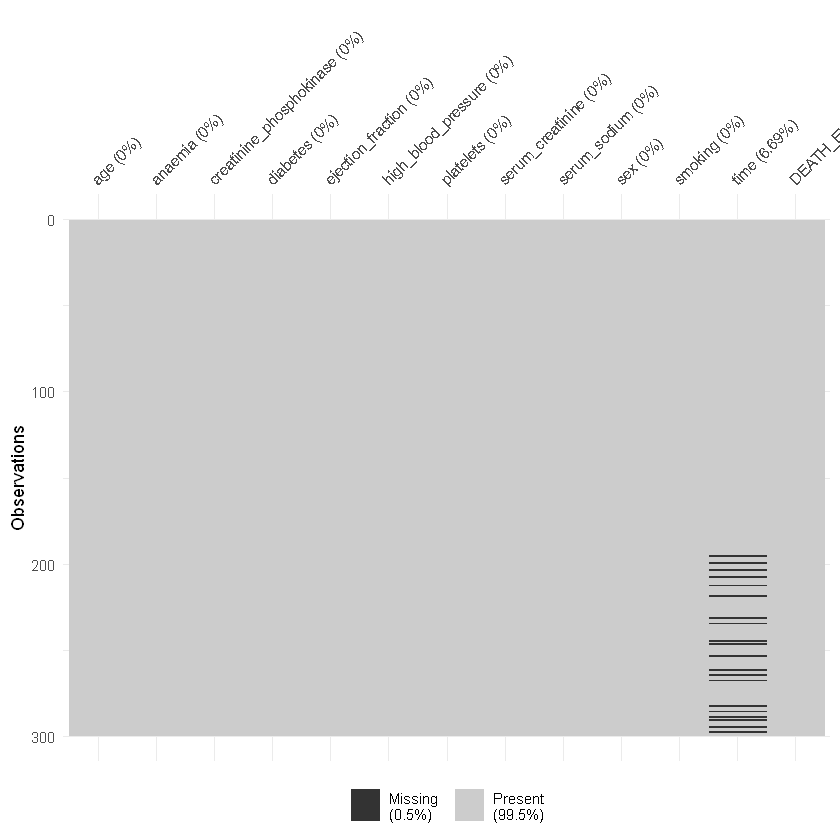

In [9]:
vis_miss(heart_failur_NA)

So, we have one column which is time that has missing values. 

## KNN

We will use k-Nearest Neighbors to predict missing values in our data set

In [12]:
heart_failur_NA_knn<- knnImputation(heart_failur_NA, k=5)


Evaluate KNN

In [13]:
actual<-heart_failur$time
prediction <-heart_failur_NA_knn$time

regr.eval(actual, prediction)

mae          mse         rmse         mape 
  6.09032437 670.49115360  25.89384393   0.02764839

### Random Forest Algorithm

In [19]:
head(heart_failur_NA_RF <- missRanger(heart_failur_NA, pmm.k = 3, num.trees = 100))



Missing value imputation by random forests

  Variables to impute:		time
  Variables used to impute:	age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking, time, DEATH_EVENT
iter 1:	.
iter 2:	.
iter 3:	.


age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
75,0,582,0,20,1,265000,1.9,130,1,0,4,1
55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
65,0,146,0,20,0,162000,1.3,129,1,1,7,1
50,1,111,0,20,0,210000,1.9,137,1,0,7,1
65,1,160,1,20,0,327000,2.7,116,0,0,8,1
90,1,47,0,40,1,204000,2.1,132,1,1,8,1


In [23]:
heart_failur_NA_RF$time

[1]   4   6   7   7   8   8  10  10  10  10  10  10  11  11  12  13  14  14
 [19]  15  15  16  20  20  22  23  23  24  26  26  26  27  28  28  29  29  30
 [37]  30  30  30  30  31  32  33  33  33  35  38  40  41  42  43  43  43  44
 [55]  45  50  54  54  55  59  60  60  60  61  63  64  65  65  66  67  68  71
 [73]  72  72  73  73  74  74  74  74  75  76  77  78  78  79  79  79  79  79
 [91]  80  80  82  82  83  83  83  85  85  86  87  87  87  87  87  88  88  88
[109]  88  88  90  90  90  90  91  91  94  94  94  95  95  95  95  95  96  97
[127] 100 104 104 105 106 107 107 107 107 107 107 108 108 108 109 109 109 110
[145] 111 112 112 113 113 115 115 117 118 119 120 120 120 120 121 121 121 121
[163] 123 126 129 130 134 135 140 145 145 146 146 146 146 146 147 147 147 147
[181] 148 150 154 162 170 171 172 172 172 174 174 174 175 180 147 180 185 186
[199] 107 186 186 186 118 187 187 187 107 187 187 187 188  74 192 193 194 195
[217] 196  60 197 197 198 200 201 201 205 205 205 206 207 207  28 208 209  95
[235] 209 209 209 210 210 211 212 212 212 120 213 175 214 214 214 214 214 215
[253]  85 215 215 216 220 230 230 231 107 233 235  54 237 240  33 244 244 244
[271] 244 244 245 245 245 245 245 246 246 246 247  96 250 250 214 250 250 180
[289] 256  83 257 258 258 134 270 271 121 280 285

In [22]:
actual<-heart_failur$time
prediction <-heart_failur_NA_RF$time

regr.eval(actual, prediction)

mae          mse         rmse         mape 
7.729097e+00 1.064946e+03 3.263352e+01 3.444821e-02

Conclusion: In this code we used two machine learning algorithms to predict the missing values. Though, the accuracy of algorithms are not perfect, because of number of reasons and one of them that parameter of algorithms